# Техническое задание.

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Тема проекта:  Исследование объявлений о продаже квартир.

## Вводная часть.

### Краткое описание проекта. 
Проект по теме "Исследовательский анализ данных" представляет собой исследование архива объявлений за несколько лет о продажзе квартир в Санкт-Петербурге и соседних населённых пунктах.

### Цель проекта: 
научиться определять рыночную стоимость объектов недвижимости и установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

### Описание данных.
Данные предоставлены в табличном варианте. По каждой квартире на продажу доступны два вида данных: первые - вписаны пользователем, вторые — получены автоматически на основе картографических данных.      В некоторых колонках таблицы есть пропуски.

### План работы.
- Обработать данные (пропуски) для получения более точных результатов;
- добавить в таблицу столбцы с параметрами, которые можно вывести из предоставленных данных, для облегчения дальнейшей автоматической обработки данных таблицы;
- исследовать данные по предложенным параметрам объектов, провести сравнительный анализ;
- сделать общий вывод.


## Прочтение данных и изучение общей информации.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Открываем файл с данными и изучаем общую информацию
df = pd.read_csv('/datasets/real_estate_data.csv','\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


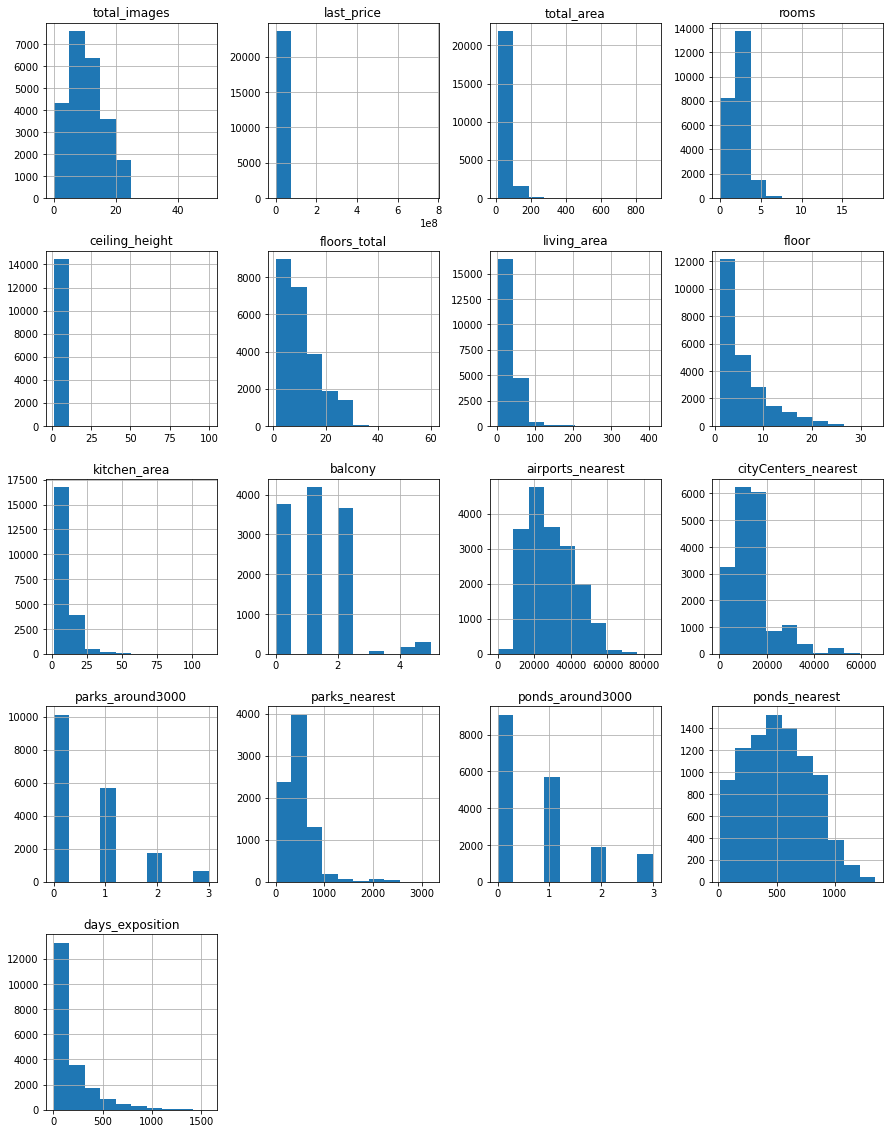

In [3]:
# строим гистограммы по каждому параметру
df.hist(figsize=(15, 20))
plt.show()

In [4]:
# посмотрим на количество заполненных ячеек в каждом столбце и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

In [5]:
# посмотрим на количество пропусков в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# посмотрим на количество пропусков в процентах
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### Вывод: возможные причины появления пропусков в данных.

1. Столбец ceiling_height (высота потолков) - продавцы могут не указывать этот параметр, считая его очевидным. Если высота потолков существенно отличается от стандартной, продавец обязательно её укажет. Пропуски в этом столбце целесообразно заменитьзначением 2,7 м (стандартная высота потолков в городских квартирах).
2. Столбцы living_area (жилая площадь) и kitchen_area (площадь кухни) без явного требования могут тоже не заполняться подателями объявлений. Заполнять эти данные средними значениями не стоит: можно ввести в заблуждение покупателя.
3. Столбец floors_total (всего этажей в доме) мог быть не заполнен намеренно, в случае, если продаваемое помещение находится на последнем этаже дома. Наверняка этого утверждать нельзя, возможно этажность основной постройки просто забыли указать. Заполнять пропуски не стоит, дабы не вводить в заблуждение покупателей. Пропущенных значений очень мало. 
4. Столбец is_apartment (апартаменты) заполнен, видимо, только в случае, если помещение является апартаментами. Отсутствующие значения логично заполнить булевым False и перевести тип данных в этом столбце в тип bool.
5. Пропуски в столбце balcony (балконы) Целесообразно заполнить значением "0". Скорее всего, их нет.
6. В случае наличия пропуска в столбце locality_name (название населённого пункта) целесообразно удалить всю строку. Строк таких ничтожно мало (49), на общий вывод они не повлияют. А жилье с адресом "на белом свете" мало кому интересно, и даже может быть предметом уловки мошенников или привлечением клиентов недобросовестными риелторами.
7. Пропуски в столбце days_exposition (количество дней до снятия объявления с публикации) могут возникнуть, если объявление ещё опубликовано.
8. Оставшиеся пропуски - в данных,  полученных автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.Такие пропуски заполнять не будем.



In [7]:
# проверим данные на дубликаты
df.duplicated().sum()

0

In [8]:
# заполним пропуски в столбце "балконы"
df['balcony'] = df['balcony'].fillna(0)

In [9]:
# заполним пропуски в столбце "высота потолков" стандартной высотой по СНИПам
df['ceiling_height'] = df['ceiling_height'].fillna(2.7)

Заполняем пропуски в расстоянии до центра в зависимости от населённого пункта. Если останутся пропуски, то будет некорректно дозаполнять медианой. Поэтому оставшиеся пропуски оставим без изменения.

In [10]:
import warnings # импортируем библиотеку
warnings.filterwarnings('ignore') #отключаем предупреждения
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name,'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality_name),'cityCenters_nearest'] = median


In [11]:
# заполним пропуски в столбце "аппартаменты"
df['is_apartment'] = df['is_apartment'].fillna(False)

In [12]:
# посмотрим на количество оставшихся пропусков в процентах
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


### Изменение типа данных.
1. Столбец first_day_exposition (дата публикации) меняем тип данных с 'object' на 'datetime'.
2. Столбец is_apartment (апартаменты) меняем тип данных на с 'object' на 'bool'.
3. Столбец balcony(балконы) меняем тип данных на целочисленный.

In [13]:
df= df.astype({'is_apartment':bool})

In [14]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [15]:
df= df.astype({'balcony':int})

In [16]:
# проверим, что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Устранение неявных дубликатов.
1. В столбце locality_name (название населённого пункта)  названия со словом "поселок" приводим к единому виду: поселок через букву "е" без уточнений.

In [17]:
df = df.dropna(subset=['locality_name'])
df = df.reset_index(drop=True)

In [18]:
df.isna().sum()
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.70,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23646,14,3100000.0,59.00,2018-01-15,3,2.70,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23647,18,2500000.0,56.70,2018-02-11,2,2.70,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23648,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [19]:
pd.set_option('display.max_rows', None)
df['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

In [20]:
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок','поселок')

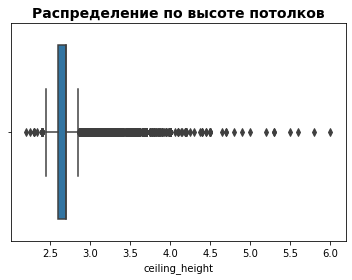

In [68]:
# посмотрим данные по параметру "высота потолков"
sns.boxplot(x='ceiling_height', data=df, orient='h')
plt.title('Распределение по высоте потолков', fontsize=14, fontweight="bold")
plt.show()

В столбце ceiling_height (высота потолков) удаляем строки со значениями больше 8  и меньше 2 (таких значений в сумме меньше 30). 

In [22]:
df = df[df.ceiling_height < 8] 
df = df[df.ceiling_height > 2]    
df = df.reset_index(drop=True)
df['ceiling_height'].value_counts()

2.70    10732
2.50     3515
2.60     1645
3.00     1109
2.80      993
2.55      980
2.75      906
2.65      676
3.20      276
3.10      203
2.90      164
3.30      141
2.56      139
3.50      130
2.57      103
2.85      101
3.40       92
2.54       83
2.64       81
2.52       79
2.53       67
2.58       63
2.77       61
2.76       60
3.15       57
2.78       51
2.95       47
3.05       46
4.00       38
3.25       36
2.67       36
3.60       36
2.73       35
2.51       34
2.72       31
3.70       30
2.74       28
2.40       23
2.68       23
3.80       20
2.84       19
2.82       18
2.66       17
3.55       17
3.12       16
3.35       16
2.83       15
2.45       15
2.62       14
3.08       14
3.90       14
2.59       14
2.63       13
2.71       13
2.88       12
3.13       11
3.18       11
3.07       11
3.06       11
4.20       10
2.87       10
2.79       10
3.33       10
2.81        9
3.45        9
2.92        9
3.02        8
3.95        8
2.48        8
3.38        8
3.75        8
3.14  

#### Вывод.
Представленные для обработки данные по многим параметрам не полные. 
- Больше всего пропусков в данных, предоставленных владельцами квартир, - по высоте потолков, площади кухни и жилой площади.
- Полученные на основе картографических данных сведения внесены в датафрейм с пропусками от 23  до 66 %. Это скажется на выводах и результатах обработки. Если расстояние до аэропорта должно быть максимально большим (чем ближе - тем больше уровень шума), а расстояние до лесопарковой зоны - максимально коротким, то под расстоянием до центра города, видимо имеется ввиду расстояние до центра Санкт-Петербурга, а не до центра посёлка. Корректно заполнить все пропуски, к сожалению, не получится.


### Добавляем в таблицу новые столбцы:
- metr_price - цена одного квадратного метра;
- weekday - день недели публикации объявления;
- month - месяц публикации объявления;
- year - год публикации объявления;
- floor_type - тип этажа квартиры;
- cityCenters_km - расстояние до центра города в километрах.

In [23]:
df['metr_price'] = df['last_price']/df['total_area']

In [24]:
df['weekday'] = df['first_day_exposition'].dt.weekday


In [25]:
df['month'] = df['first_day_exposition'].dt.month

In [69]:
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,17.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,9.0


In [27]:
# напишем функцию для сортировки по этажу квартиры
row_values = [1, 1] #значения номера этажа квартиры и значения количества этажей в доме
row_columns = ['floor', 'floors_total'] #названия столбцов 
row = pd.Series(data=row_values, index=row_columns)
#categorize_floor(row)

def categorize_floor(row):
    floor = row['floor']
    total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        if floor == total:
            return 'последний'
        return 'другой' 
    except:
        return 'нет категории'
   

In [28]:
df['floor_type'] = df.apply(categorize_floor, axis=1)
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [29]:
#создадим столбец с расстоянием до центра города в километрах
df['cityCenters_km'] = np.ceil(df['cityCenters_nearest']/1000) 


In [30]:
cols = list(df.columns)
cols

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'metr_price',
 'weekday',
 'month',
 'year',
 'floor_type',
 'cityCenters_km']

## Исследовательский анализ данных/ 
### Изучим следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолка;
- этаж квартиры;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центрагорода в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

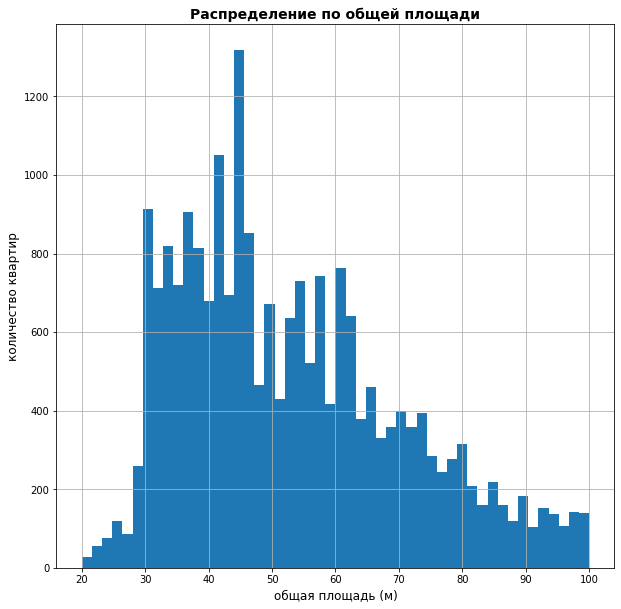

In [70]:
# смотрим распределение по общей площади
df.total_area.hist(bins=50,figsize=(10,10), range = (20, 100))
plt.title('Распределение по общей площади', fontsize=14, fontweight="bold")
plt.xlabel("общая площадь (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Основная масса предлагаемых к продаже квартир имеют общую площадь от 30 до 65 метров.Самые большие (многочисленные) значения находятся в районе 40-50 м2. Квартиры общей площадью более 230 м2 очень редки."Выбросы" присутствуют до 630 м2 - такая площадь квартир маловероятна.

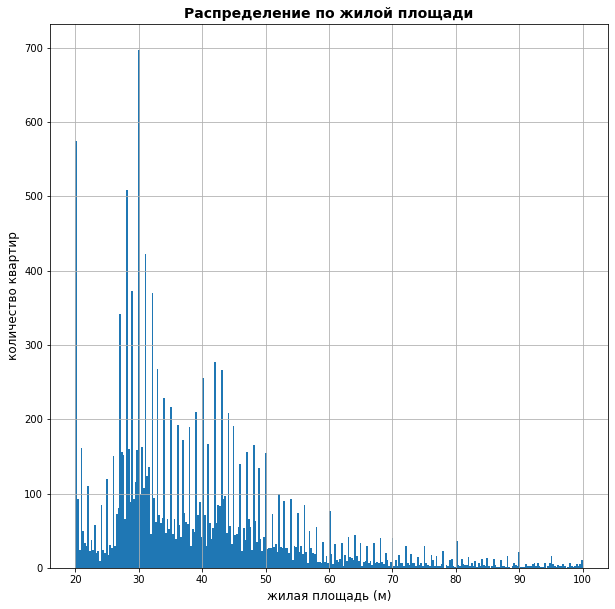

In [72]:
# смотрим распределение жилой площади
df.living_area.hist(bins=300,figsize=(10,10), range = (20, 100))
plt.title('Распределение по жилой площади', fontsize=14, fontweight="bold")
plt.xlabel("жилая площадь (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Практически все значения лежат в промежутке от 20 до 50 м2. На данной диаграмме 2 пика значений: один находится в районе 20 м2, второй - в районе 30 м2. Значения после 130 м2 встречаются точечно."Выбросы можно проследить до 420 м2.    

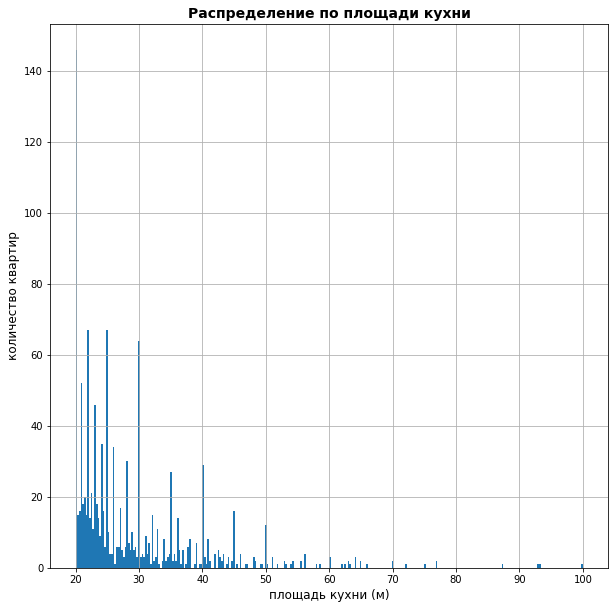

In [73]:
# смотрим распределение по площади кухни
df.kitchen_area.hist(bins=300,figsize=(10,10), range = (20, 100))
plt.title('Распределение по площади кухни', fontsize=14, fontweight="bold")
plt.xlabel("площадь кухни (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Основная масса значений расположена в промежутке от 20 до 30 м2.

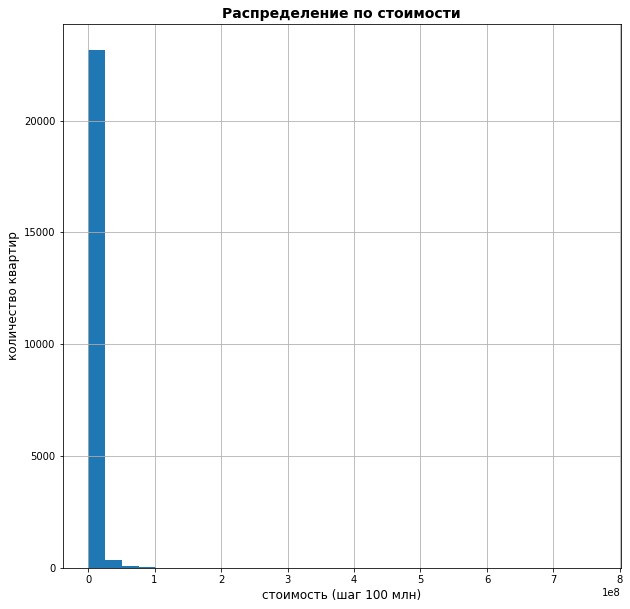

In [86]:
# смотрим распределение по стоимости объекта
#df['last_price'].plot(kind='line',title='last_price', figsize=(15,15))
#plt.show()
df.last_price.hist(bins=30,figsize=(10,10))
plt.title('Распределение по стоимости', fontsize=14, fontweight="bold")
plt.xlabel("стоимость (шаг 100 млн)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Разброс по цене не очень большой. Хотя на гистограмме последняя цифра 800 млн.руб., практически все значения находятся в промежутке от 1 млн. до 20 млн. рублей. 

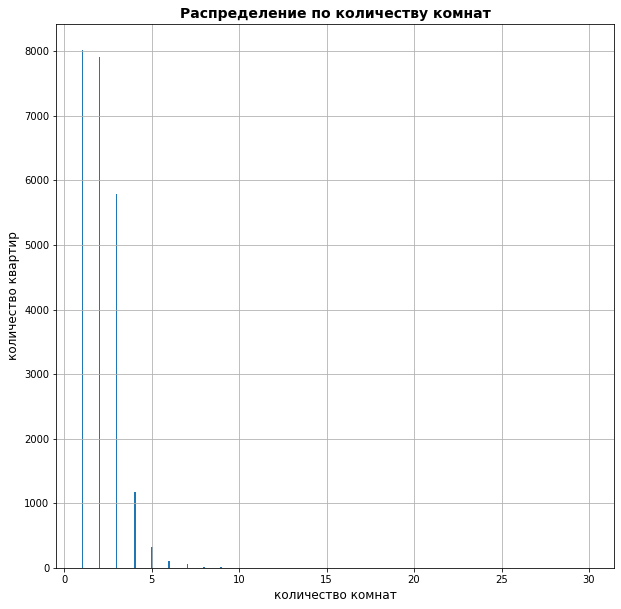

In [82]:
# смотрим распределение по количеству комнат
df.rooms.hist(bins=300, figsize=(10,10),range = (1, 30))
plt.title('Распределение по количеству комнат', fontsize=14, fontweight="bold")
plt.xlabel("количество комнат", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Самое многочисленное предложение 1- и 2-х комнатные квартиры - более и чуть менее 8000 предложений. предложение 3-х комнатных квартир отстаёт более, чем на 2000 объектов.Есть в продаже квартиры из 4 и 5 комнат. Предложений квартир от 6 до 10 комнат - от 100 - до единиц.

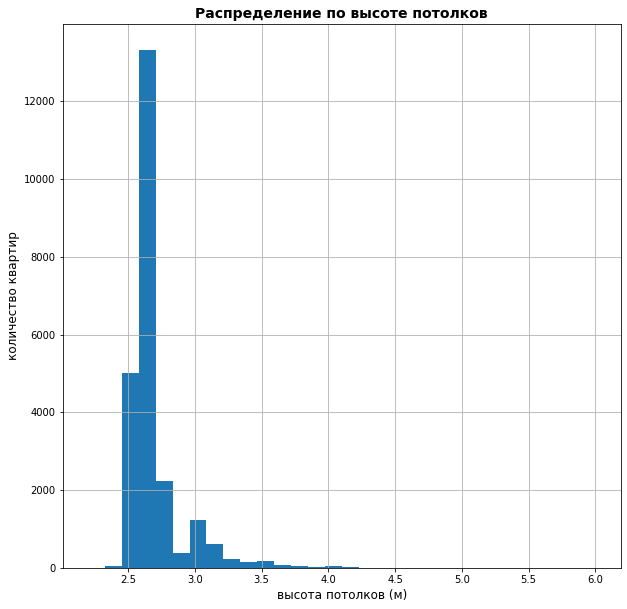

In [81]:
# смотрим распределение по высоте потолков
df.ceiling_height.hist(bins=30, figsize=(10,10))
plt.title('Распределение по высоте потолков', fontsize=14, fontweight="bold")
plt.xlabel("высота потолков (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Чаще всего высотапотолков в предлагаемых объектах -2,7 м (мы помним, что пропуски в данном столбце мы заполняли именно этим значением) - такая высота потолков - у половины квартир. Большинство значений располагаются в промежутке 2,5 - 2,8 м. Квартир с указанием высоты потолков свыше 3 м -в сумме меньше 1000 штук

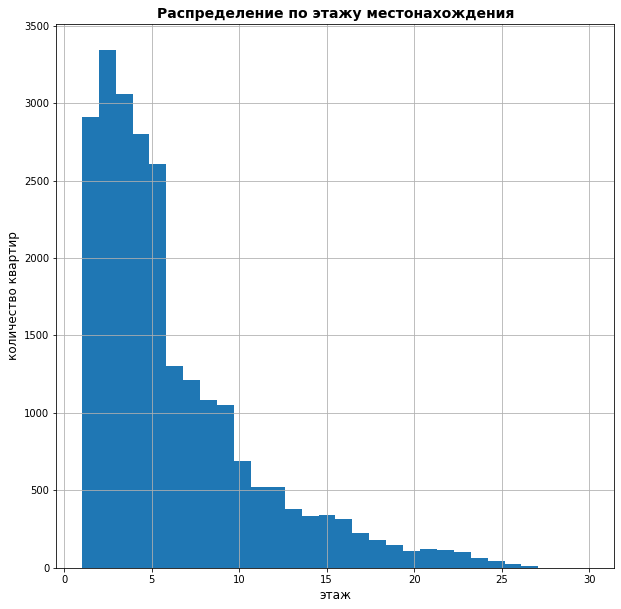

In [87]:
# смотрим распределение по этажу местонахождения квартиры
df.floor.hist(bins=30, figsize=(10,10), range = (1, 30))
plt.title('Распределение по этажу местонахождения', fontsize=14, fontweight="bold")
plt.xlabel("этаж", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Самое многочисленное предложение квартир, находящихся на втором этаже (примерно 3300 предложений - 14% от общего количества. Предложения есть по этажам с 1 по 33 включительно. Но основная масса квартир из архива данных находятся с 1 по 10 этаж.

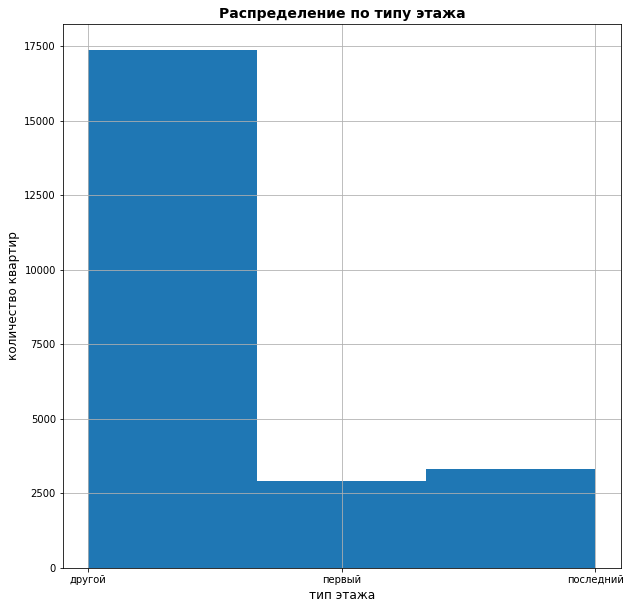

In [89]:
# смотрим распределение по типу этажа
df.floor_type.hist(bins=3, figsize=(10,10))
plt.title('Распределение по типу этажа', fontsize=14, fontweight="bold")
plt.xlabel("тип этажа", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

На первом этаже расположены 2900 объектов (чуть больше 10% от общего количества). Это могут быть не только квартиры, но и частные одноэтажные дома за городом. Количество объектов для продажи, находящихся на первом этаже,  соответствует данным предыдущей гистограммы. Квартир на последнем этаже немногим больше 3000 штук. Все прочие объекты находятся на этажах со второго по предпоследний.В данном случае, это квартиры.

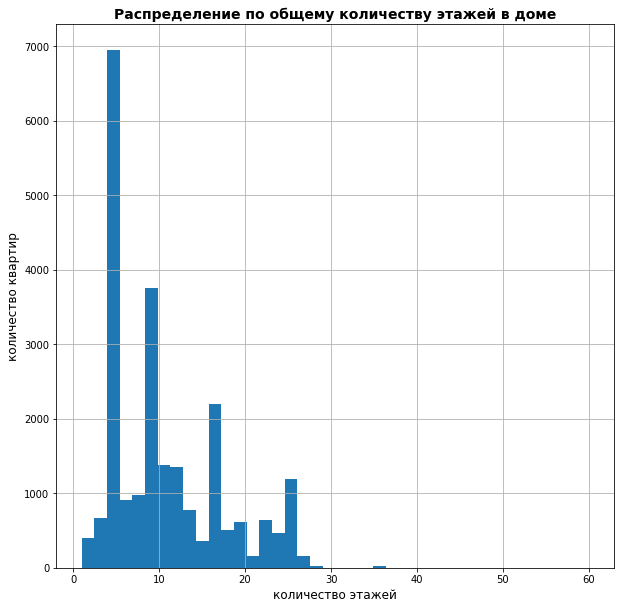

In [91]:
# смотрим распределение по общему количеству этажей в доме
df.floors_total.hist(bins=40, figsize=(10,10))
plt.title('Распределение по общему количеству этажей в доме', fontsize=14, fontweight="bold")
plt.xlabel("количество этажей", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Самое большое предложение квартир - в пятиэтажных домах (в таких домах,как правило, нет лифта) - примерно 5800 штук (25% от общего предложения выборки). Многочисленны также предложения квартир в девятиэтажных домах (застройка такими домами городов была массовой с 70-х годов прошлого столетья) - примерно 15% от общего предложения.  Меньше половины всех предложений - в домах этажностью от 10 до 28. На этой гистаграмме, как и на прочих,можно видеть единичные объекты с очень большими параметрами: в 35-ти и 36-ти этажных домах.

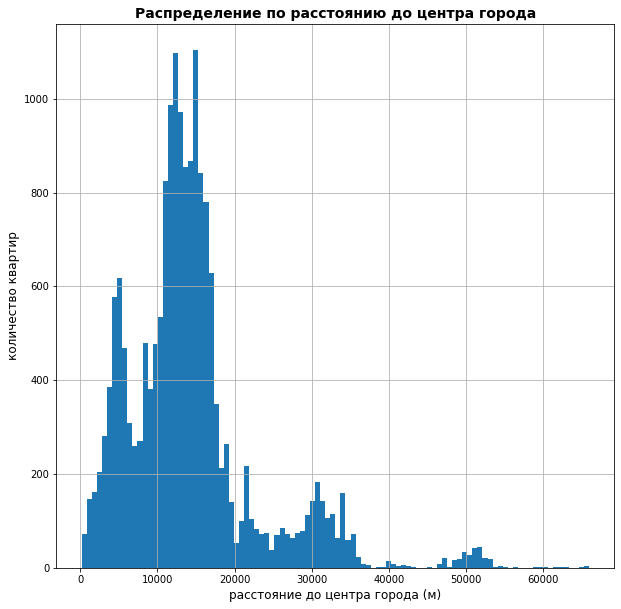

In [92]:
# смотрим распределение по расстоянию до центра города в метрах
df.cityCenters_nearest.hist(bins=100, figsize=(10,10))
plt.title('Распределение по расстоянию до центра города', fontsize=14, fontweight="bold")
plt.xlabel("расстояние до центра города (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Более половины квартир архива находятся на расстоянии 10000 -20000 м от центра города. По расстоянию - это пригороды Санкт-Петербурга. в удалённости от центра до 10 км находится порядка 30% предлагаемого жилья.

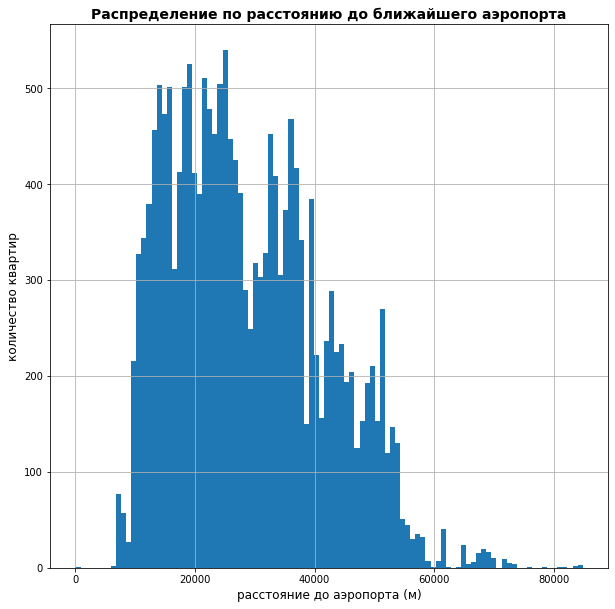

In [93]:
# смотрим распределение по расстоянию до ближайшего аэропорта
df.airports_nearest.hist(bins=100, figsize=(10,10))
plt.title('Распределение по расстоянию до ближайшего аэропорта', fontsize=14, fontweight="bold")
plt.xlabel("расстояние до аэропорта (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Большинство объектов удалены от аэропорта на 8-55 км.На расстоянии от 5до 8 км от аэропорта расположены порядка 200 квартир.

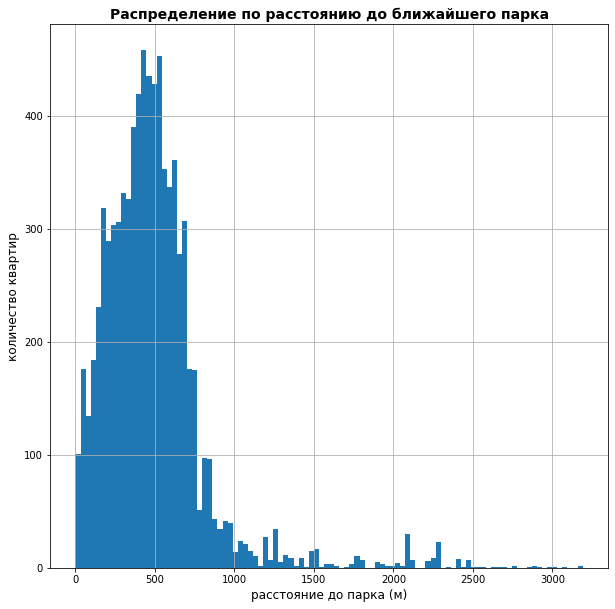

In [94]:
# смотрим распределение по расстоянию до ближайшего парка
df.parks_nearest.hist(bins=100, figsize=(10,10))
plt.title('Распределение по расстоянию до ближайшего парка', fontsize=14, fontweight="bold")
plt.xlabel("расстояние до парка (м)", fontsize=12)
plt.ylabel("количество квартир", fontsize=12)
plt.show()

Подавляющее большинство продаваемых объектов находится в непосредственной близости от парка - на расстоянии до 1000 м. Мы учитываем, что парк может быть не один. Мы говорим о лесопарковых зонах в непосредственной близости от предлагаемого жилья, в том числе.

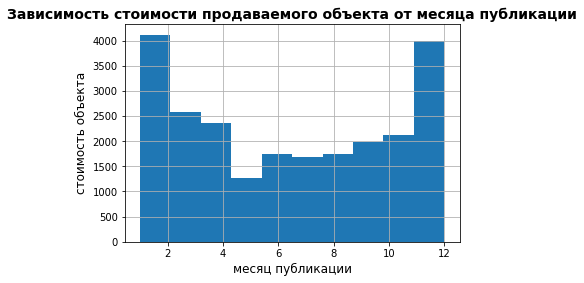

In [97]:
# месяц публикации объявления
df['month'].hist()
plt.title('Зависимость стоимости продаваемого объекта от месяца публикации', fontsize=14, fontweight="bold")
plt.xlabel("месяц публикации", fontsize=12)
plt.ylabel("стоимость объекта", fontsize=12)
plt.show()

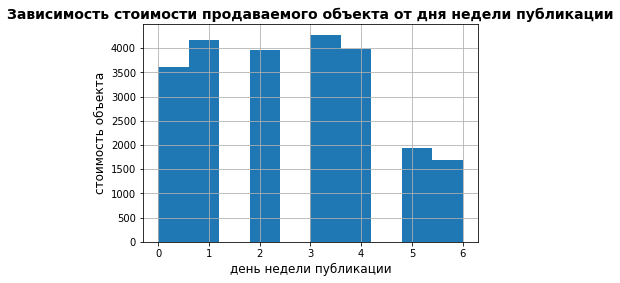

In [98]:
# день публикации объявления
df['weekday'].hist()
plt.title('Зависимость стоимости продаваемого объекта от дня недели публикации', fontsize=14, fontweight="bold")
plt.xlabel("день недели публикации", fontsize=12)
plt.ylabel("стоимость объекта", fontsize=12)
plt.show()

Самая высокая цена на квартиры прописана в объявлениях, размещённых в декабре- январе месяцах. Самая низкая цена на квартиры наблюдается в апреле - июне. по дням недели: цена существенно ниже в объявлениях, размещённых в выходные дни. 

### Изучим, как быстро продавались квартиры.

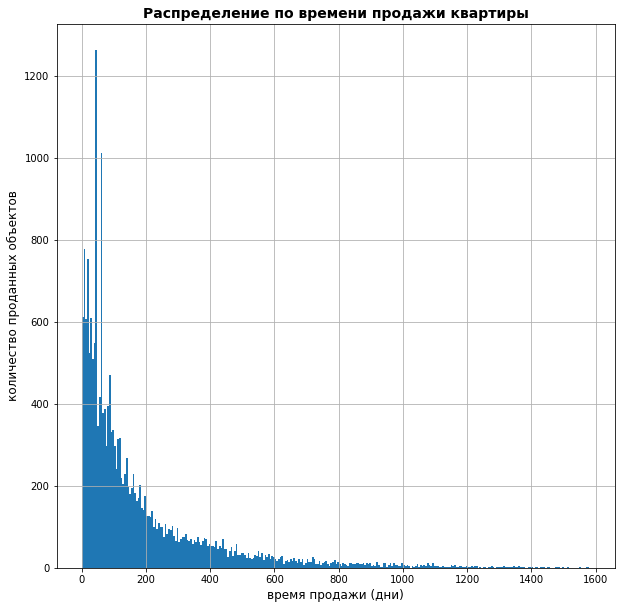

In [99]:
df.days_exposition .hist(bins=300, figsize=(10,10))
plt.title('Распределение по времени продажи квартиры', fontsize=14, fontweight="bold")
plt.xlabel("время продажи (дни)", fontsize=12)
plt.ylabel("количество проданных объектов", fontsize=12)
plt.show()

Судя по диаграмме, квартиры продавались достаточно быстро. Самое большое пиковое значение (примерно 1300 объектов) были проданы в течение 30 дней. Основная масса квартир продавалась до 200 дней. Есть объекты, продаваемые более длительно, до 1000 дней и даже дольше. Хотя так долго могут быть размещены объявления о продаже не конкретных объектов, а объявления риелторских компаний или отдельных практикующих риелторов с целью маркетингового изучения рынка жилья, например.Или объявления мошенников.
Тот же вывод подтверждается и данными,полученными методом ниже (boxplot). Медиана срока продажи находится в районе 40 дней, основная масса значений находится в промежутке от 20 до 220 дней. За пределами 500 дней тоже есть значения, но их значительно меньше. Как выбросы можно рассматривать значения от 1500 до 1600 дней.

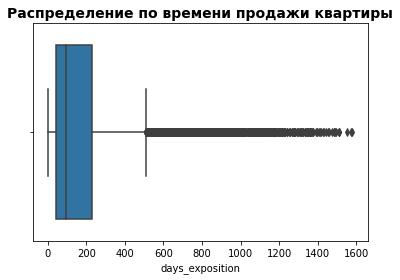

In [100]:
sns.boxplot(x='days_exposition', data=df, orient='h')
plt.title('Распределение по времени продажи квартиры', fontsize=14, fontweight="bold")
plt.show()


Сделаный выше вывод подтверждается и данными,полученными методом boxplot. Медиана срока продажи находится в районе 40 дней, основная масса значений находится в промежутке от 20 до 220 дней. За пределами 500 дней тоже есть значения, но их значительно меньше. Как выбросы можно рассматривать значения от 1500 до 1600 дней.
Таким образом, быстрыми можно считать продажи за срок менее 20 дней, а необычайно долгими - продажи сроком более 500 дней.

### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.
Построим графики зависимости цены от:
-общей площади;
-жилой площади;
-площади кухни;
-количества комнат;
-этажа, на котором расположена квартира (первый, последний, другой);
-даты размещения (день недели, месяц, год).

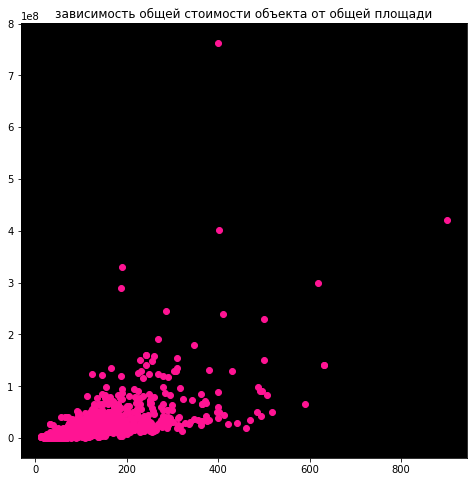

In [47]:
# смотрим зависимость общей стоимости объекта от общей площади
x = df['total_area']    #  x - координаты точек
y = df['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('зависимость общей стоимости объекта от общей площади')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

In [48]:
# коэффициент корреляции Пирсона
df['total_area'].corr(df['last_price'])

0.65381608774176

Зависимость общей стоимости объекта от общей площади помещения прослеживается: график вытянут вправо и вверх. Коэффициент корреляции Пирсона свидетельствует о связи данных средней тесноты,и даже приближается к высокой.

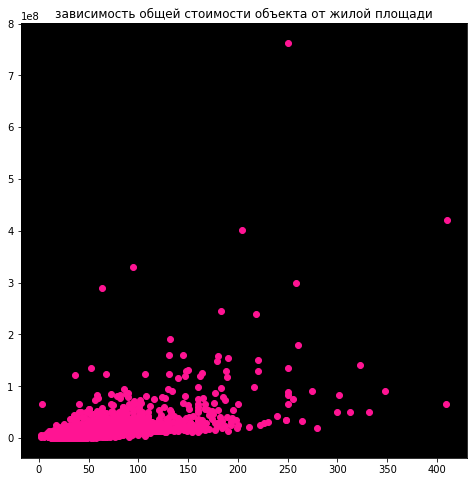

In [49]:
# смотрим зависимость общей стоимости объекта от жилой площади
x = df['living_area']    #  x - координаты точек
y = df['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('зависимость общей стоимости объекта от жилой площади')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

In [50]:
df['living_area'].corr(df['last_price'])

0.5666557635575434

График похож на предыдущий. Также прослеживается устойчивое возрастание цены объекта вслед за возрастанием жилой площади. Но коэффициент корелляции ниже, хотя и остаётся средним.Эти данные связаны между собою слабее. 

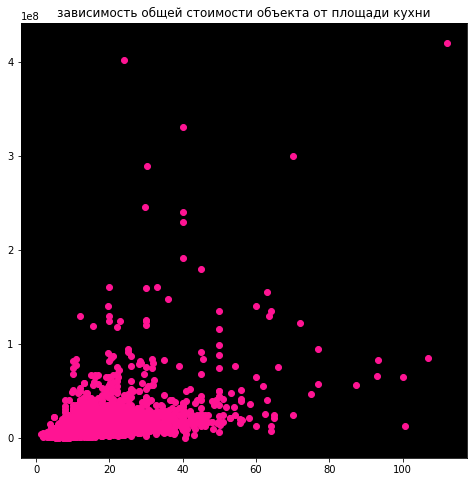

In [51]:
# зависимость общей стоимости объекта от площади кухни
x = df['kitchen_area']    #  x - координаты точек
y = df['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('зависимость общей стоимости объекта от площади кухни')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()



In [52]:
df['kitchen_area'].corr(df['last_price'])

0.5201743305249954

Связь между данными прослеживается, но слабее, чем по первым двум параметрам. Коэффициент корелляции это подтверждает.

,mean,len
,last_price,last_price
rooms,,
0,3.339447e+06,196.0
1,3.833372e+06,8020.0
2,5.593206e+06,7907.0
3,8.186117e+06,5789.0
4,1.343989e+07,1174.0
5,2.376208e+07,326.0
6,3.170975e+07,105.0
7,5.147007e+07,59.0


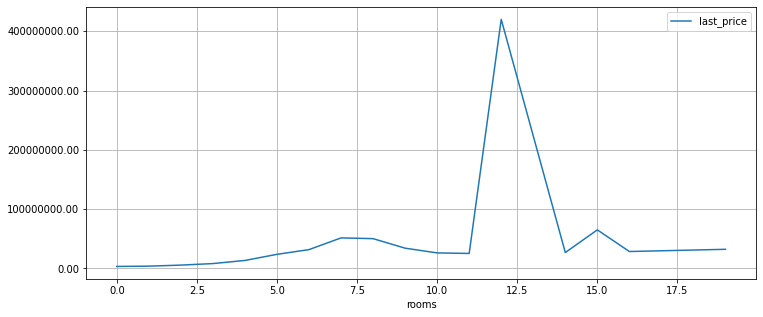

In [53]:
# зависимость общей стоимости объекта от количества комнат
from matplotlib.ticker import FormatStrFormatter
ax = (df
    .pivot_table(index = 'rooms',values = 'last_price')
    .plot(grid = True, figsize =(12,5))
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

pd.pivot_table(df,
               index=["rooms"],
               values=["last_price"],
               aggfunc=[np.mean, len])

In [54]:
df['rooms'].corr(df['last_price'])

0.36355243028346906

Зависимость итоговой стоимости объекта от количества комнат гораздо меньше, чем от площади квартиры. Коэффициент корелляции близок к низкому. Это видно на графике. Также стоит отметить,что обектов с большим количеством комнат (свыше 7) - очень немного. Отсутствуют значения 13 и 17 комнат.

In [55]:
# зависимость общей стоимости объекта от типа этажа
pd.pivot_table(df,
               index=["floor_type"],
               values=["last_price"],
               aggfunc=[np.median, len])



,median,len
,last_price,last_price
floor_type,,
другой,4850000.0,17376.0
первый,3900000.0,2907.0
последний,4300000.0,3324.0


In [56]:
pd.pivot_table(df,
               index=["floor_type"],
               values=["last_price"],
               aggfunc=[np.mean, len])


,mean,len
,last_price,last_price
floor_type,,
другой,6.679760e+06,17376.0
первый,4.803235e+06,2907.0
последний,7.364028e+06,3324.0


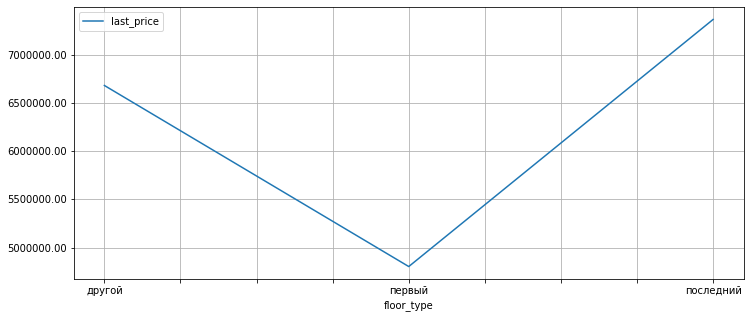

In [57]:
from matplotlib.ticker import FormatStrFormatter
ax = (df
    .pivot_table(index = 'floor_type',values = 'last_price')
    .plot(grid = True, figsize =(12,5))
)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


На графике видно, что самая низкая стоимость у объектов, находящихся на первом этаже, а самая высокая - у самых высокоэтажных квартир.По медиане разброс в значениях меньше, чем по среднему.

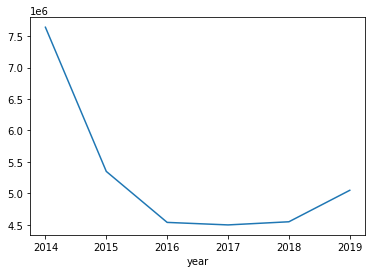

In [58]:
# зависимость общей стоимости объекта от года публикации объявления
df.groupby('year')['last_price'].median().plot();

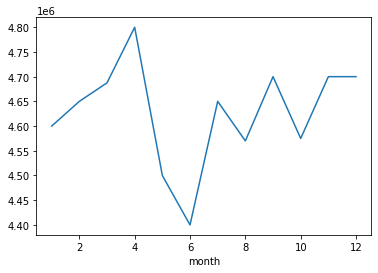

In [59]:
# зависимость общей стоимости объекта от месяца публикации объявления
df.groupby('month')['last_price'].median().plot();

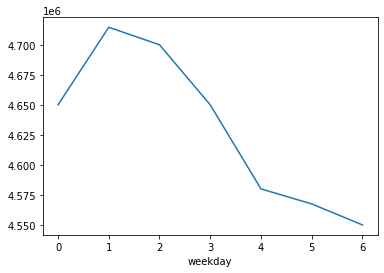

In [60]:
# зависимость общей стоимости объекта от дня недели публикации объявления
df.groupby('weekday')['last_price'].median().plot();

Зависимость цены от времени публикации объявления прослеживается явно: с 2014 по 2016 год стоимость квартир сильно снизилась. Объявления о продаже самых дорогих квартир были размещены в марте- апреле, а о продаже самых дешёвых - в июне. Если смотреть по дням недели, пик стоимости приходится на вторник - среду. К концу недели стоимостьобъектов существенно снижается.

#### Вывод.
Анализируя графики зависимости, можно отметить следующее:
- наблюдается планомерный рост общей стоимости квартир с возрастанием их общей площади, небольшое пиковое значение есть в районе 20 м2 и большое - в районе 190 м2, следующие пики можно наблюдать в районе 290 и 400 м2;
- зависимость цены от увеличения жилой площади также прослеживается - общая стоимость увеличивается пропорционально увеличению количества квадратных метров, пиковые значения можно наблюдать в районе 5 м2 и 180 м2; после 200 м2 график разрежен;
- площадь кухни влияет на повышение цены сильнее предыдущих двух параметров, пиковые значения в районе 18, 20 и 30 м2;
- зависимость от количества комнать на значениях от 1 до 3 прослеживается слабо, сильно возрастает цена в промежутке от 5 до 7 комнат;
- квартиры на первом этаже сущ0ественно дешевле,чем квартиры на любом "другом", самые дорогие квартиры - на последних этажах;
- **На графике по дате публикации объявления наблюдается следующее:**
- В разрезе по годам с 2014 по 2016 годы происходит падение стоимости объектов, в 2016-2017 годах цена стабилизируется, в 2018 году наблюдается небольшой рост стоимости объектов.
- В разрезе по месяцам самая высокая стоимость объектов наблюдается в апреле месяце, самая низкая - в июне; с января по март и с июля по декабрь стоимость колеблется, но не значительно.
- В разрезе по дням недели публикации в начале недели предлагаются к продаже самые дорогие объекты; к концу недели стоимость продаваемых объектов существенно снижается.

### Посчитаем цену одного квадратного метра в 10 населённых пунктах  с наибольшим числом объявлений. 

In [61]:
# создадим сводные таблицы
df_top_10 = df.pivot_table(index='locality_name', values='metr_price',aggfunc=['mean', 'count']) 
df_top_10.columns=['metr_price_mean', 'metr_price_count'] 
df_top_10.sort_values(by=['metr_price_count'],ascending = False, inplace=True)
display(df_top_10.head(10))
df_top_10.tail()



,metr_price_mean,metr_price_count
locality_name,,
Санкт-Петербург,114830.455038,15700
поселок Мурино,85656.214377,554
поселок Шушары,78677.364217,440
Всеволожск,68719.320400,397
Пушкин,103125.819291,369
Колпино,75424.579098,338
поселок Парголово,90175.913458,327
Гатчина,68757.678644,306
деревня Кудрово,92473.547576,299


,metr_price_mean,metr_price_count
locality_name,,
поселок Дзержинского,33439.490446,1
поселок Гончарово,41371.158392,1
поселок Гладкое,30769.230769,1
поселок Высокоключевой,34931.506849,1
село Шум,33898.305085,1


### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [62]:
# отсортируем данные
df_top_10.sort_values(by=['metr_price_mean'],ascending = False, inplace=True)
display(df_top_10.head(10))
df_top_10.tail(10)


,metr_price_mean,metr_price_count
locality_name,,
Зеленогорск,115122.799198,24
Санкт-Петербург,114830.455038,15700
поселок Репино,104238.614786,4
Пушкин,103125.819291,369
Сестрорецк,101757.616875,183
поселок Лисий Нос,100660.814239,3
Кудрово,100285.114241,172
деревня Мистолово,98549.976709,11
поселок Левашово,96997.690531,1


,metr_price_mean,metr_price_count
locality_name,,
поселок Житково,14956.275202,2
деревня Ям-Тесово,13711.553373,2
деревня Сижно,13709.677419,1
поселок Тёсово-4,12931.034483,1
деревня Малая Романовка,12724.550898,1
поселок Совхозный,12629.129129,2
деревня Выскатка,12335.480902,2
деревня Вахнова Кара,11688.311688,1
поселок станции Свирь,11481.481481,2


### Посчитаем среднюю цену каждого километра удалённости от центра города в Санкт-Петербурге.

In [63]:
df_new = df[df['locality_name'] == 'Санкт-Петербург']
df_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,17.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,9.0
7,5,7915000.0,71.6,2019-04-18,2,2.70,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0


In [64]:
df_new = df_new.groupby(["cityCenters_km"]).mean()
df_new.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year
cityCenters_km,,,,,,,,,,,,,,,,,,,,,
1.0,9.918605,2.344232e+07,112.130000,3.220930,3.075116,4.720930,69.733500,3.011628,0.046512,0.000000,...,617.255814,1.906977,395.148649,2.488372,278.546512,222.000000,187324.130319,2.290698,7.127907,2017.081395
2.0,10.241667,1.885085e+07,103.079583,3.237500,3.069167,4.745833,65.478616,3.012500,0.008333,0.004167,...,1493.300000,1.804167,422.990196,2.508333,220.451883,293.859296,166603.755531,2.666667,6.316667,2017.025000
3.0,10.853420,1.616331e+07,98.856482,3.114007,3.093029,4.996743,61.141575,3.192182,0.000000,0.003257,...,2449.048860,1.397394,375.831897,1.827362,379.984674,242.095618,146662.860056,2.706840,6.045603,2017.169381
4.0,10.368321,1.345377e+07,91.635534,3.024809,2.991450,5.463602,55.930948,3.368321,0.003817,0.003817,...,3525.669847,0.946565,463.485804,1.362595,512.621951,248.663529,129364.513748,2.456107,6.583969,2017.223282
5.0,9.835722,1.363202e+07,96.163903,2.925028,2.973319,7.832780,54.839795,4.590959,0.002205,0.002205,...,4531.880926,0.764057,482.205273,0.875413,533.863296,261.597403,137475.497055,2.391400,6.401323,2017.147740


In [65]:
df_s = df_new.iloc[:, [0,20]]
df_s.head(30)


,total_images,metr_price
cityCenters_km,,
1.0,9.918605,187324.130319
2.0,10.241667,166603.755531
3.0,10.853420,146662.860056
4.0,10.368321,129364.513748
5.0,9.835722,137475.497055
6.0,10.185956,146979.232519
7.0,9.936170,152277.893519
8.0,11.150246,141404.908508
9.0,8.992504,119904.146290


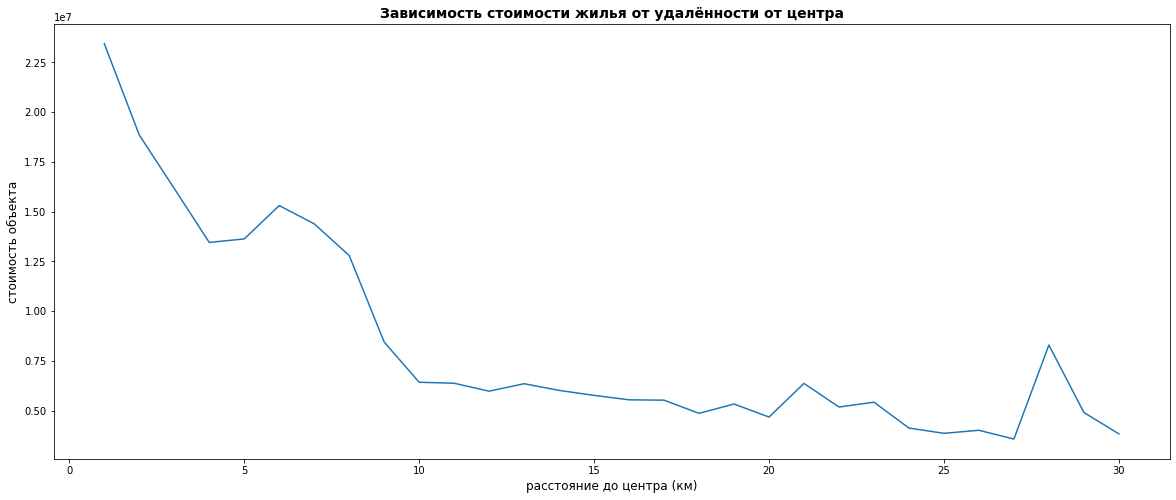

In [103]:
df[df['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_km')['last_price'].mean().plot(figsize = (20, 8))
plt.title('Зависимость стоимости жилья от удалённости от центра', fontsize=14, fontweight="bold")
plt.xlabel("расстояние до центра (км)", fontsize=12)
plt.ylabel("стоимость объекта", fontsize=12);

На графике чётко видно,что при удалении от центра стоимость квадратного метра жилья снижается. С первого по пятый километр цена снижается резко, с пятого по десятый километр - снижается цена более плавно. Затем цена стабилизируется до двадцатьпятого километра.

## Общий вывод.

Исследовав данные по заявленным параметрам, делаем следующие выводы:
1. В предложенном архиве находятся данные о продаваемых в Санкт-Петербурге и Ленинградской области квартирах и домах, продававшихся с января 2015 по июль 2019 года.
2. Данные имеют пропуски,некоторые из которых удалось заполнить средними значениями, медианой или булевыми значениями (да/нет)
3. Данные подробно исследованы, все диаграмы снабжены комментариями.
4. Недвижимость в Санкт-Петербурге и Ленинградской области весьма ликвидна, квартиры продаются быстро: оснорвная масса - от 20 до 220 дней.
5. До 2018 года цены на квартиры были подвержены сезонным колебаниям (летом квартиры продавались дороже).С осени 2018 года сезонностьне прослеживается.
6.  Больше всего объявлений подано на продажу жилья в таких населённых пунктах как Санкт-Петербург,поселок Мурино,	поселок Шушары, Всеволожск,	Пушкин,	Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг. Средняя стоимость квадратного метра жилья в этих населённых пунктах - от 114830.45 руб (Санкт-Петербург) до 68719.32 руб (Всеволожск).
7. Топ-10 самых дорогих по стоимости 1 м2 жилья открывает Зеленогорск	(115122.79 руб.), а завершает Мурино (92722.70 руб.). Самое дешёвое жильё - в Ленинградской облапсти (поселок Житково, деревня Ям-Тесово, деревня Сижно, поселок Тёсово-4, 	деревня Малая Романовка, поселок Совхозный, деревня Выскатка, деревня Вахнова Кара, поселок станции Свирь, деревня Старополье). Здесь стоимость 1 м2 жилья составляет от 15 до 11, 5 тыс. рублей.
8.  по мере удалённости от центара стоимость 1 м2 жилья снижается в среднем на 2000 руб за 1 м2 - первые 4 км.; с 5 по 7 км удалённости от центра стоимость 1 м2 немного возрастает, затем продолжает снижаться.

Исходя из выявленных зависимостей, можно предложить заказчику следующие рекомендации:
- учесть выводы исследования при установке следующих параметров: срока размещения объявления, стоимости 1 м2 продаваемого жилья, обязательных для заполнгения граф в объявлении о продаже квартир и т.д. Это позволит автоматизированной системе отследить аномалии и мошенническую деятельность.

